In [1]:
from keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

In [2]:
model=load_model('efficientnet.h5')

In [21]:
eye_cascade=cv2.CascadeClassifier('C:/Users/Admin/Downloads/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/haarcascades/haarcascade_eye.xml')

In [50]:
def eyes(path):
    img=cv2.imread(path)    
    eye_rects=eye_cascade.detectMultiScale(img)
    eye_points=[]
    for x,y,w,h in eye_rects:
        eye_points.append([x,y,w,h])    
    x1=eye_points[0][0]
    y1=eye_points[0][1]
    x2=eye_points[0][0]+eye_points[0][2] 
    y2=eye_points[0][1]+eye_points[0][3]+30
    left_eye=img[y1:y2,x1:x2]
    plt.imshow(left_eye)
    left_eye=Image.fromarray(left_eye)
    left_eye=left_eye.resize((224,224))
    left_eye=asarray(left_eye)
    if len(eye_points)>1:
        x1=eye_points[1][0]
        y1=eye_points[1][1]
        x2=eye_points[1][0]+eye_points[1][2]  
        y2=eye_points[1][1]+eye_points[1][3]+30
        right_eye=img[y1:y2,x1:x2]
    #print(eye_points)
        right_eye=Image.fromarray(right_eye)
        right_eye=right_eye.resize((224,224))
        right_eye=asarray(right_eye)
    else:
        right_eye=0
    return left_eye,right_eye,eye_points


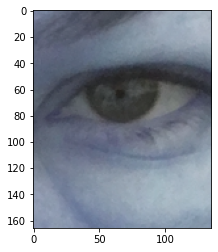

In [51]:
left_eye,right_eye,eye_points=eyes('C:/Users/Admin/Downloads/Puffy eyes-20210517T075601Z-001/Puffy eyes/swollen eyes 4.png')
img=cv2.imread('C:/Users/Admin/Downloads/Puffy eyes-20210517T075601Z-001/Puffy eyes/swollen eyes 4.png')

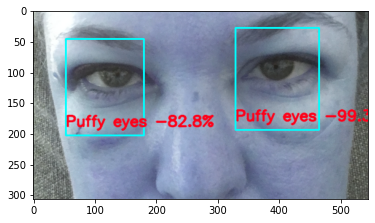

In [52]:
def predict_puffyeyes(left_eye,right_eye,l1,img):      
    test_image=np.expand_dims(left_eye,axis=0)
    result=model.predict(test_image)
    if result[0][0]>result[0][1]:
        print("no puffy eyes present")            
    else:
        #print('left puffy eyes percentage',result[0][1]*100,'%')
        b=round(result[0][1]*100,2)
        x,y,w,h=l1[0]
        cv2.rectangle(img, (x,y), (x+w,y+h+30), (0,255,255), 2)
        cv2.putText(img,'Puffy eyes -'+str(b)+'%',(x,y+h+15), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,0,25), 2, cv2.LINE_AA)          
    if type(right_eye)!=int:
        test_image=np.expand_dims(right_eye,axis=0)
        result=model.predict(test_image)
        if result[0][0]>result[0][1]:
            print("no puffy eyes present")
                    
        else:
            #print('right puffy eyes percentage',result[0][1]*100,'%')
            a=round(result[0][1]*100,1)
            x,y,w,h=l1[1]
            cv2.rectangle(img, (x,y), (x+w,y+h+30), (0,255,255), 2)
            cv2.putText(img,'Puffy eyes -'+str(a)+'%',(x,y+h+15), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,0,25), 2, cv2.LINE_AA)
    return img
img=predict_puffyeyes(left_eye,right_eye,eye_points,img)
plt.imshow(img)   
